In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Ángel Jaramillo Valencia
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [2]:
def derivada_cinco(f, h):
  def f_prima(x):
    return((f(x - 2 * h)) - 8 * f(x-h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

  return f_prima

In [3]:
h = 0.05
x_val = np.linspace(0, 2 * np.pi, 10)
f = lambda x: np.cos(x)

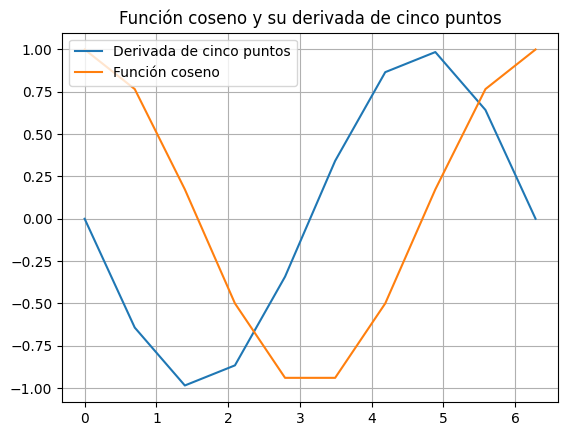

In [26]:
derivada = derivada_cinco(f, h)

plt.plot(x_val, derivada(x_val), label = 'Derivada de cinco puntos')
plt.plot(x_val, np.cos(x_val), label = 'Función coseno')
plt.title('Función coseno y su derivada de cinco puntos')
plt.legend()
plt.grid()
plt.show()

In [24]:
h1 = np.linspace(0.01, 0.1, 100)
derivada_val = []
for i in h1:

  derivada1 = derivada_cinco(f, i)
  derivada_val.append(abs(derivada1(np.pi/8) - np.sin(np.pi/8)))

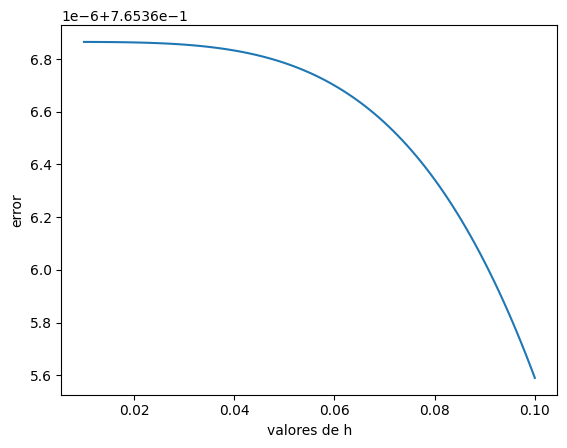

In [25]:
plt.plot(h1, derivada_val)
plt.xlabel('valores de h')
plt.ylabel('error')
plt.show()

Vemos que el error disminuye conforme los valores de h aumentan

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [39]:
def centered_diff(f, h):

  def f_prime(x_):
    return(f(x_ + h) - f(x_ - h)) / (2 * h)

  return f_prime

In [43]:
def second_diff(f, h):
  def f_prima1(x1):
    return (f(x1 + h) - 2 * f(x1) + f(x1 - h)) / (h**2)

  return f_prima1

In [65]:
x_vals = np.linspace(1.8, 2.2, 6)

In [54]:
x = sp.symbols('x')
y_ = x * sp.exp(x)
dy_ = sp.diff(y,x)

y = sp.lambdify(x, y_)
dy = sp.lambdify(x, dy_)

In [78]:
dv_cen = centered_diff(y,h = 0.01)
dv_cen(2)

22.167784055776885

In [56]:
print(f'la derivada de la función evaluada en 2 es igual a: {dv_cen(2)}')

la derivada de la función evaluada en 2 es igual a: 22.18256485779758


In [57]:
print(f'la segunda derivada evaluada en dos es igual a: {second_diff(y,h = 0.05)(2)}')

la segunda derivada evaluada en dos es igual a: 29.56546174215901


In [62]:
print(f'el valor de la derivada en x = 2 usando scipy es: {dy(2)}')

el valor de la derivada en x = 2 usando scipy es: 22.16716829679195


In [66]:
valores_f = y(x_vals)
dy_dx = np.gradient(valores_f, x_vals)
dy_dx
print(f'el valor de la derivada en x = 2 usando Numpy.Gradient es: {dy_dx[2]}')

el valor de la derivada en x = 2 usando Numpy.Gradient es: 21.05158515496123


In [70]:
h2 = np.linspace(0.01, 0.1, 10)
errores_s = []
errores_n = []

for i in h2:

  der = centered_diff(y, i)
  deri = der(2)

  errores_s.append(abs(deri - dy(2)))
  errores_n.append(abs(deri - dy_dx[2]))

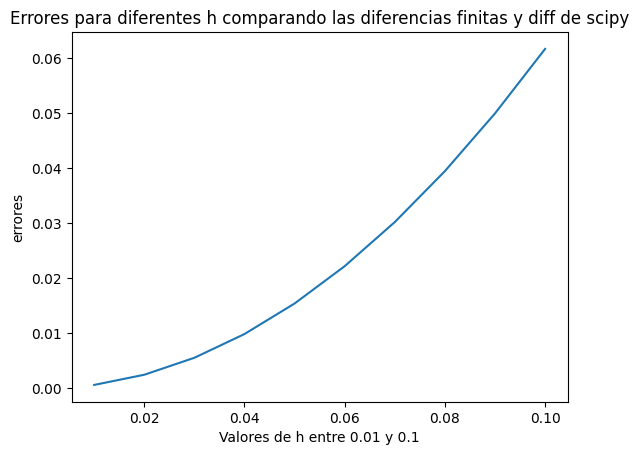

In [73]:
plt.plot(h2, errores_s)
plt.xlabel('Valores de h entre 0.01 y 0.1')
plt.ylabel('errores')
plt.title('Errores para diferentes h comparando las diferencias finitas y diff de scipy')
plt.show()

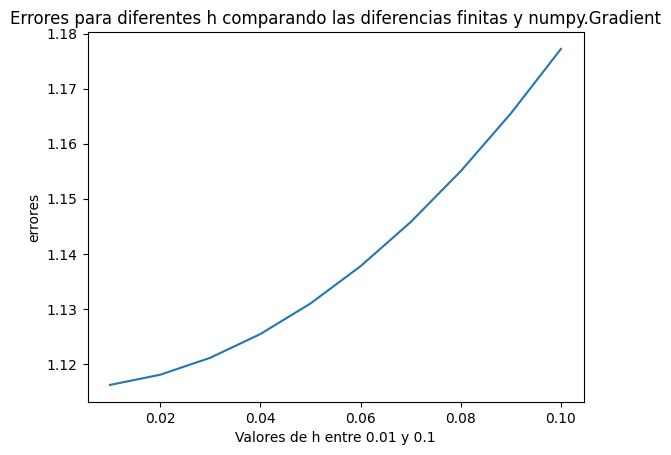

In [74]:
plt.plot(h2, errores_n)
plt.xlabel('Valores de h entre 0.01 y 0.1')
plt.ylabel('errores')
plt.title('Errores para diferentes h comparando las diferencias finitas y numpy.Gradient')
plt.show()

En este caso los errores aumentan conforme h lo hace, caso contrario al punto anterior. No sabemos si esto pueda deberse a la cantidad de puntos tomados en el arreglo, el método de derivación utilizado o la función en sí. En este caso el h más óptimo resultó siendo el menor(0.01)

#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [95]:
def derivada_tres(f, h):
  def f_prima(x2):
    return((f(x2 + h)) -  f( x2 - h ))  / (2 * h)

  return f_prima

In [96]:
dv_cinco = derivada_cinco(y, h = 0.01)
dv_tres =  derivada_tres(y, h = 0.01)

In [97]:
print(f'la derivada obtenida con diferencias finitas con el h con el menor error encontrado de la función anterior es: {dv_cen(2)}')
print(f'la derivada obtenida con derivada de cinco puntos con el h con el menor error encontrado de la función anterior es: {dv_cinco(2)}')
print(f'la derivada obtenida con derivada de tres puntos con el h con el menor error encontrado de la función anterior es: {dv_tres(2)}')

la derivada obtenida con diferencias finitas con el h con el menor error encontrado de la función anterior es: 22.167784055776885
la derivada obtenida con derivada de cinco puntos con el h con el menor error encontrado de la función anterior es: 22.167168279550165
la derivada obtenida con derivada de tres puntos con el h con el menor error encontrado de la función anterior es: 22.167784055776885


Vemos una diferencia en los resultados apenas en el cuarto decimal

In [103]:
print(f'el error de la derivada usando diferencias finitas y Sympy.diff es: {abs(dv_cen(2) - dy(2))}')
print(f'el error de la derivada usando derivada de tres puntos y Sympy.diff es: {abs(dv_tres(2) - dy(2))}')
print(f'el error de la derivada usando derivada de cinco puntos y Sympy.diff es: {abs(dv_cinco(2) - dy(2))}')

el error de la derivada usando diferencias finitas y Sympy.diff es: 0.0006157589849351552
el error de la derivada usando derivada de tres puntos y Sympy.diff es: 0.0006157589849351552
el error de la derivada usando derivada de cinco puntos y Sympy.diff es: 1.7241784888710754e-08


Vemos la diferencia tan grande entre la derivada de cinco puntos y las demás dos. Concluyendo que este método de diferenciación es el más efectivo (al menos en casos similares a este)
